# Intro

The easiest algorithms in Supervised ML are the following:

<u>For Regression, it is Linear Regression</u> with equation $y = mx+b$ for predicting a continuous $y$ value.

<u>For Classification, it is Discrete Perceptron</u> with equation $ax_{1} + bx_{2} + c = 0$ for linearly separating two classes: $ax_{1} + bx_{2} + c \ge 0$, class 1; $ax_{1} + bx_{2} + c < 0$, class 0.


# Supervised ML: Regression

Regression aims at measuring the relationship between two or more variables - input variables / independent variables (features; x) and and outcome / dependent variable (label; y). Regression is used for predicting and forecasting numerical values. 

We can classify the regression models based on many categories. For example, based on the number of input variables, regression can be:
- Simple regression: uses one independent variable as input;
- Multiple regression: uses two / more independent variables;

Based on the number of dependent variables (labels) to be predicted, :
- Univariate regression: predict one label; $y = mx+b$
- Multivariate regression: predict multiple labels;

The most popular regression models:
- Linear regression: assumes that there is a linear relationship between input and output variables; it uses a linear function to explain that relationship;
- Polynomial regression: uses polynomials to estimate the relationship between variables;
- Logistic regression: uses a logistic function or sigmoid to model a probability for binary classification problems

Some definitions below:
| Term | Definition |
| - | - | 
| Weight | Factor by which we multiply each feature. If the weight is $0$, then this feature is irrelevant to predicting the label. |
| Bias | The constant in the formula that's not attached to any feature. |
| Linear model | describes a continuous response variable as a function of one or more predictor variables. A linear model makes a prediction from the weighted sum of the features along with bias (a constant; intercept). |
| Linear relationship | A relationship where a relationship between two variables can be modeled by a straight line. |
| Monotonic relationship | A relationship where two variables have the same sign of change, e.g. move in the same direction. This can be linear (two variables change at the same rate) or non-linear (change at different rates) |
| Interpolation | Predicting a value *within the range* of the data used for training. |
| Extrapolation | Predicting a value *beyond the range* of the data used for training. |


<img src="Media/Residuals.png" width="600"/> 

---

In ML, we can see two very different ways to train a Linear Regression model:
- *Using an equation* that computes the parameters that are the most optimised for for the training data. <u>Least squares regression</u> equation for the line of best fit.
- *Using an iterative optimization approach* - <u>Gradient Descent</u>. This approach gradually optimises the model parameters to minimise the cost function on the data, eventually converging on the same parameters as the equation described before. The goal is to eventually find parameters that minimise a cost function, e.g. RMSE or MSE. 


For the **equation of regression (best-fit) line** ($y = b+mx$), the parameters (bias and weights) can be calculated as per the **Least Squares Regression** method:

$$ \begin{cases} y = b + mx \\ m = r (\cfrac{S_{y}}{S_{x}}) = \cfrac{ \sum((x_{i}-\overline{x})(y_{i}-\overline{y})) }{ \sum(x_{i}-\overline{x})^{2} } \\ b = \overline{y} - m\overline{x} \end{cases} $$
, where $y$ - response (dependent) variable; $b$ - intercept (a constant; bias; base value); $m$ - slope (feature weight); $x$ - predictor (independent) variable; $\overline{y}$ and $\overline{x}$ - means of the two variables; $r$ - correlation (Pearson) between $x$ and $y$; $S_{y}$, $S_{x}$ - SD of y and x, respectively.


Interpretation of $m$ slope: increase of $x$ by 1 changes the $y$ variables by the $m$.

_**General Linear Regression equation**_ (for 1+ features):
$$ \hat{y} = w_{0} + w_{1}x_{1} + w_{2}x_{2} + ... + w_{n}x_{n} $$
, $\hat{y}$ - the predicted value, $n$ - number of features, $x$ - features, $w_{0}$ - $i$-th model parameter ($w_{0}$ - bias and $w_{1}$-$w_{n}$ - feature weights)

---

Now let's consider using Gradient Descent approach. There are different types of GD, such as Batch GD (standard) and Stochastic Gradient Descent (described in "Grokking Machine Learning" book). 

---

**Problems**

- Correlated predictors (variables): in multiple regression, variables correlating to each other, making it harder to interpret the regression equation coefficients; 
- Multicollinearity: an extreme case of correlated variables; 


## Correlation

**Correlation** - enumerates direction and strength of a relationship. Enumerated by correlation coefficient. 

| Correlation metric | Use |
| - | - |
| Pearson's correlation coefficient | Linear relationships only. Monotonic relationships (or non-monotonic if it's oscillating and non-symmetric) |
| Spearman's Rank correlation coefficient | Linear or non-linear relationships. Monotonic relationships (or non-monotonic if it's oscillating and non-symmetric). For non-normally distributed data. |
| Kendall Tau Rank correlation coefficient | Monotonic relationships, small sample size. For non-normally distributed data. |


---

*Pearson's correlation coefficient (r; standard correlation coefficient)*: LINEAR RELATIONSHIPS. Determines the strength of the linear relationship between the two normally-distributed variables (on a scatterplot). To calculate it, you need to multiply deviations from the mean of the two variables, divided by the product of SD for the two variables: 

$$ r = \frac{COVARIANCE(X, Y)}{S_{x}S_{Y}} = \frac{1}{n-1} * \frac{ \sum_{i=1}^{n} ( (x_{i}-\overline{x})(y_{i}-\overline{y}) ) }{ S_{x} S_{y} } = \frac{ \sum_{i=1}^{n} ( (x_{i}-\overline{x})(y_{i}-\overline{y}) ) }{ \sqrt{ \sum(x-\overline{x})^{2} \sum(y-\overline{y})^{2} } } $$

- $-1 < r < 1$
- $r = 1$ - perfect correlation
- $r = 0$ - independent 

---

*Coefficient of determination* ($r^{2}$, $R^{2}$): The proportion of variance explained by the model, from 0 to 1. Measure of how close the data points are to the estimated regression line. $r^{2} = 0.902$ means that the regression equation provides a very good fit with 90.2% of the variation in RHR explained by the regression equation. 



In [ ]:
""" Calculating correlation coefficient - Pearson - with built-in Pandas module """
import pandas as pd
import matplotlib.pyplot as plt
import random


df = pd.DataFrame({
	'column 1': list(range(0,11)),
	'column 1_1': list(range(0,11)),
	'column 1_11': [i*100 for i in range(11)],
	'column 1_2': [0,0.2,0.4,0.6,0.8,1,1.2, 1.4, 1.6, 1.8, 2],
	'column 1_3': list(range(0, 22, 2)),
	'column 2': list(range(10,-1,-1)),
	'column 3': [ random.randint(1,10) for i in range(0,11)  ]
})
print(5)
print(
    df['column 1'].corr(
        df['column 1_1'],
        method = 'pearson' # 'pearson', 'kendall', 'spearman'
    )
)

df.corr()


5
1.0


,column 1,column 1_1,column 1_11,column 1_2,column 1_3,column 2,column 3
column 1,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,0.233329
column 1_1,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,0.233329
column 1_11,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,0.233329
column 1_2,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,0.233329
column 1_3,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,0.233329
column 2,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,-0.233329
column 3,0.233329,0.233329,0.233329,0.233329,0.233329,-0.233329,1.000000


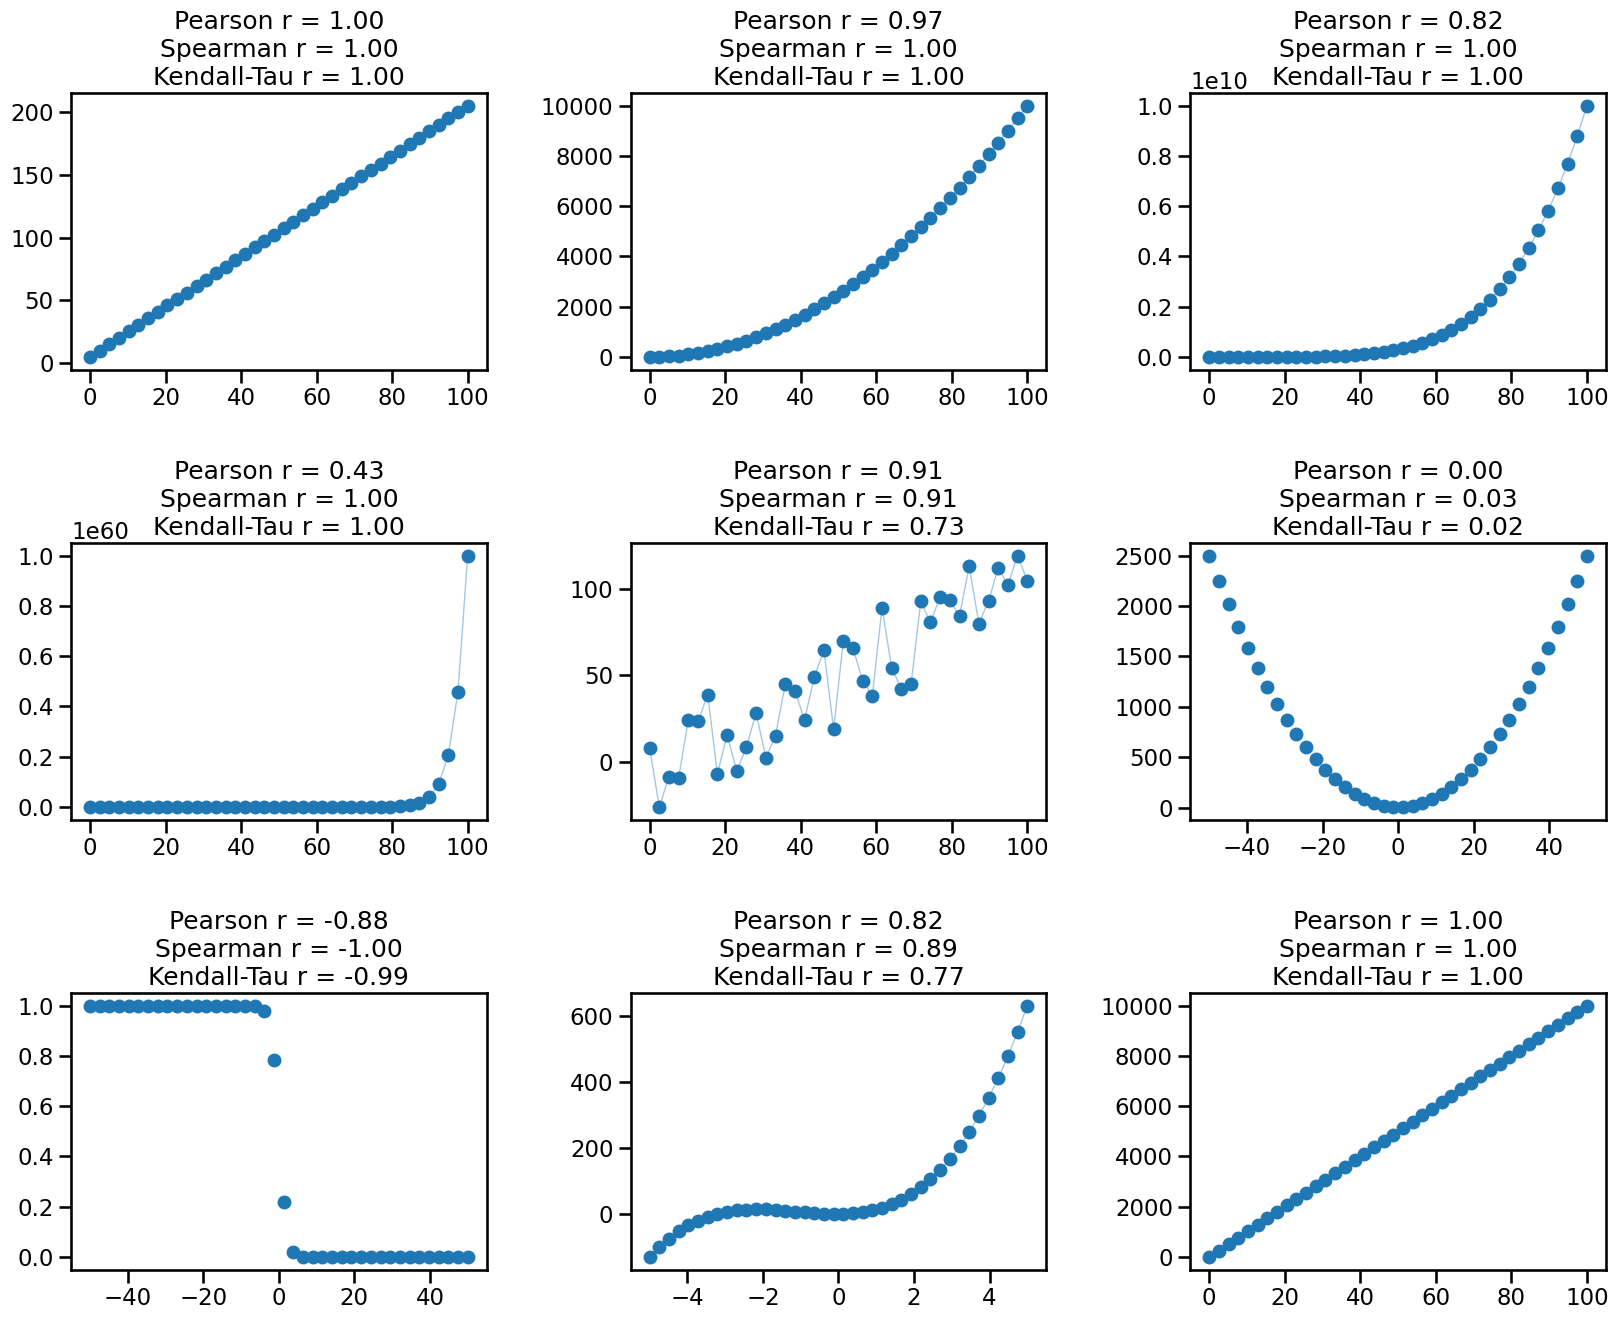

In [2]:
"""
Comparison of different correlation coefficients for different shapes of datasets:
- Pearson r
- Spearman r
- Kendall-Tau r
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import random
import math

np.random.seed(42)
random.seed(42)
sns.set_context('talk')
fig, axes = plt.subplots(3, 3, figsize=(17,14))
### Params
lw = 1
x = np.linspace(0, 100, 40)
x_symm = np.linspace(-50, 50, 40)
x_short = np.linspace(-5, 5, 40)
x_normal = np.random.normal(0, 1, size=40)
x_random = np.random.uniform(0,10, 40)

def plot_figure(row, col, x, y):
    axes[row,col].scatter(x, y, lw=lw)
    ### Calculate pearson r
    val1, pval1 = sp.stats.pearsonr(x, y)
    ### Calculate spearman r
    val2, pval2 = sp.stats.spearmanr(x, y)
    ### calculate Kendall-tau r
    val3, pval3 = sp.stats.kendalltau(x, y)
    if val2 > 0.7:
        axes[row,col].plot(x, y, lw=lw, alpha=0.4)
    axes[row,col].set_title(f"Pearson r = {val1:.2f}\nSpearman r = {val2:.2f}\nKendall-Tau r = {val3:.2f}")

plot_figure(0,0, x, x*2 + 5)
plot_figure(0,1, x, x**2)
plot_figure(0,2, x, x**5)
plot_figure(1,0, x, x**30)
plot_figure(1,1, x, [i + random.uniform(-30,30) for i in x])
plot_figure(1,2, x_symm, x_symm**2 + 3)
plot_figure(2,0, x_symm, 1/(1+ math.e**(x_symm)))
plot_figure(2,1, x_short, 3*x_short**3 + 10*x_short**2 + x_short + 1)
plot_figure(2,2, x, x*100)

plt.tight_layout(pad=2)


### Correlation matrix

<Axes: >

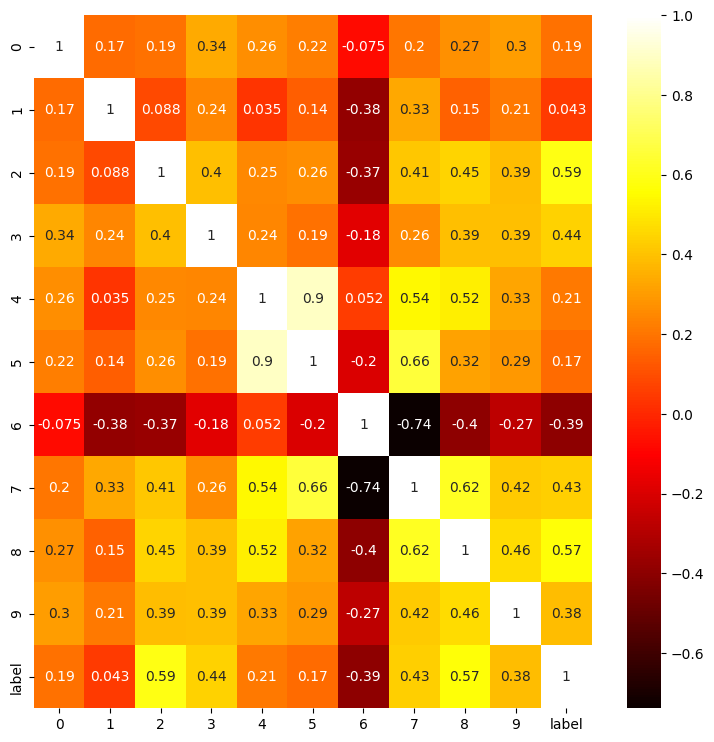

In [ ]:
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

boston = datasets.load_diabetes();

df = pd.DataFrame(boston.data)
df['label'] = boston.target

### Correlation matrix
cor = df.corr()
plt.figure(figsize=(9,9))
sns.heatmap(cor, annot=True, cmap='hot')

In [ ]:
df.corr(method='spearman')

,0,1,2,3,4,5,6,7,8,9,label
0,1.000000,0.177463,0.200554,0.350859,0.262524,0.221711,-0.106973,0.221017,0.265176,0.296235,0.197822
1,0.177463,1.000000,0.098079,0.261508,0.027790,0.134695,-0.394584,0.337524,0.174625,0.203277,0.037401
2,0.200554,0.098079,1.000000,0.397985,0.287829,0.295494,-0.371172,0.459068,0.491609,0.384664,0.561382
3,0.350859,0.261508,0.397985,1.000000,0.275224,0.205638,-0.191033,0.280799,0.396071,0.381219,0.416241
4,0.262524,0.027790,0.287829,0.275224,1.000000,0.878793,0.015308,0.520674,0.512864,0.332173,0.232429
5,0.221711,0.134695,0.295494,0.205638,0.878793,1.000000,-0.197435,0.652283,0.349947,0.286483,0.195834
6,-0.106973,-0.394584,-0.371172,-0.191033,0.015308,-0.197435,1.000000,-0.789694,-0.450420,-0.290863,-0.410022
7,0.221017,0.337524,0.459068,0.280799,0.520674,0.652283,-0.789694,1.000000,0.640390,0.413700,0.448931
8,0.265176,0.174625,0.491609,0.396071,0.512864,0.349947,-0.450420,0.640390,1.000000,0.453023,0.589416
9,0.296235,0.203277,0.384664,0.381219,0.332173,0.286483,-0.290863,0.413700,0.453023,1.000000,0.350792


<Axes: >

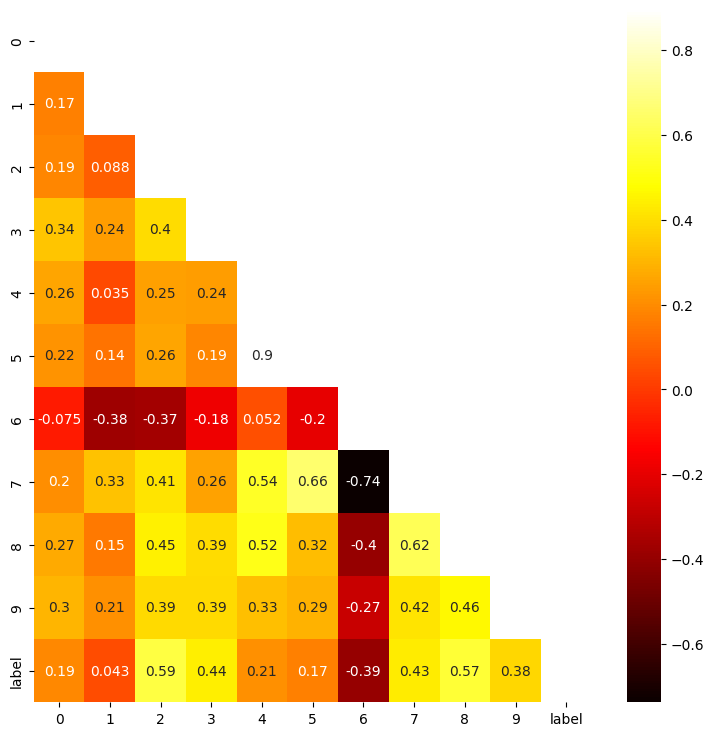

In [ ]:
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

boston = datasets.load_diabetes();

df = pd.DataFrame(boston.data)
df['label'] = boston.target

### Correlation matrix
cor = df.corr()
matrix = np.triu(cor)
plt.figure(figsize=(9,9))
sns.heatmap(cor, annot=True, cmap='hot', mask=matrix)

## Simple Linear

Models relationship between two variables - one feature and one label. 

$b$ = y-intercept. Indicates line translation upward. 

$m = \frac{dy}{dx}$ = slope. Indicates angle of line (increase in slope -> rotation counter-clockwise)


Text(0.5, 1.0, 'Linear regression equation\ny=mx+b')

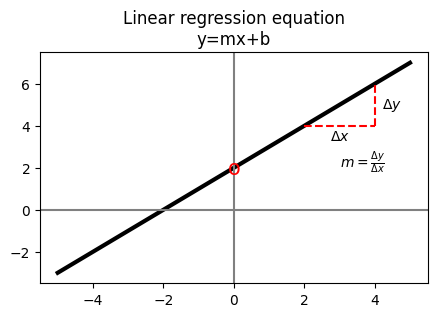

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(5,3))
x = np.linspace(-5, 5, 30)
plt.plot( x, x+2, color='black', lw=3 )
plt.axvline(0, color='grey')
plt.axhline(0, color='grey')

plt.plot( [2,4], [4,4], color='red', ls='--' )
plt.plot( [4,4], [4,6], color='red', ls='--' )
plt.text( 3, 3.5, rf'$\Delta x$', horizontalalignment='center', verticalalignment='center')
plt.text( 4.5, 5, rf'$\Delta y$', horizontalalignment='center', verticalalignment='center')
plt.text( 3, 2, r'$m = \frac{\Delta y}{\Delta x}$' )
plt.text( 0, 2, 'o', color='red', horizontalalignment='center', verticalalignment='center', size=15)

plt.title('Linear regression equation\ny=mx+b')

Sample size: 100
Mean values: 1.0113636596003013 | 7.061527562457419
Sums of squared diff from the mean: [29.19873053] | [386.0986221]
Standard deviations: 0.543 | 1.975
Sum of products of differences from the mean of x and y: [91.9214698]
Correlation coefficient r: 0.866
--------------------------------------------------
Slope m = 3.148
Intercept a = 3.878
Regression equation: y = 3.878 + 3.148x


<AxesSubplot:>

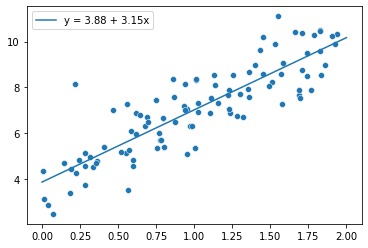

In [ ]:
""" Calculating linear regression by hand """
import numpy as np, matplotlib.pyplot as plt, seaborn as sns

# x_variable = [17, 13, 12, 15, 16, 14, 16, 16, 18, 19]
# y_variable = [94, 73, 59, 80, 93, 85, 66, 79, 77, 91]

x_variable = 2 * np.random.rand(100, 1)
y_variable = 4 + 3 * x_variable + np.random.randn(100, 1)

N = len(x_variable)
print(f"Sample size: {N}")

x_mean, y_mean = np.mean(x_variable), np.mean(y_variable)
print(f"Mean values: {x_mean} | {y_mean}")



sum_squaredDiff_x = sum([ (x - x_mean)**2 for x in x_variable ])
sum_squaredDiff_y = sum([ (y - y_mean)**2 for y in y_variable ])
print(f"Sums of squared diff from the mean: {sum_squaredDiff_x} | {sum_squaredDiff_y}")

x_SD = np.sqrt( sum_squaredDiff_x / (N-1) )
y_SD = np.sqrt( sum_squaredDiff_y / (N-1) )
print(f"Standard deviations: {x_SD[0]:.3f} | {y_SD[0]:.3f}")

sum_product_diffFromMean_x_y = sum([ (x-x_mean)*(y-y_mean) for x, y in zip(x_variable, y_variable) ])
print(f"Sum of products of differences from the mean of x and y: {sum_product_diffFromMean_x_y}")

# Calculate correlation coefficient r
r = sum_product_diffFromMean_x_y / np.sqrt( sum_squaredDiff_x * sum_squaredDiff_y )
print(f"Correlation coefficient r: {r[0]:.3f}")
print('-'*50)

# Calculate slope
m = r * (y_SD / x_SD)
print(f"Slope m = {m[0]:.3f}")
# Calculate intercept
a = y_mean - m*x_mean
print(f"Intercept a = {a[0]:.3f}")
# Derive the regression equation
print(f"Regression equation: y = {a[0]:.3f} + {m[0]:.3f}x")
sns.scatterplot(x=x_variable[:,0], y=y_variable[:,0])
x1 = np.arange(0, 2.1, 1)
a = a[0]; m=m[0]
sns.lineplot( x=x1, y= a + m*x1, label=f'y = {a:.2f} + {m:.2f}x' )

3.179245283018868 30.10377358490566
RMSE: 8.82
Actual equation with RMSE: y = (30.10 + 3.18x) +/- 8.82 


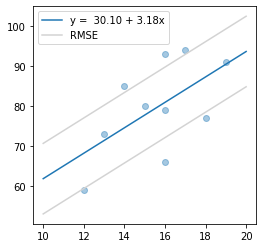

In [ ]:
""" Using scipy """
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

x_variable = [17, 13, 12, 15, 16, 14, 16, 16, 18, 19]
y_variable = [94, 73, 59, 80, 93, 85, 66, 79, 77, 91]

slope, intercept, r_value, p_value, std_err = stats.linregress(x_variable,y_variable)
print(slope, intercept)

fig = plt.figure(figsize=(4, 4))
x = np.arange(10, 21, 1 )
plt.plot( x, x*slope + intercept, label=f'y =  {intercept:.2f} + {slope:.2f}x' )
plt.scatter( x_variable, y_variable, alpha=0.4 )
plt.legend()


y_predicted = [ x*slope + intercept for x in x_variable ]
sum_squared_diff = sum([ (y_hat - y)**2 for y, y_hat in zip(y_variable, y_predicted) ])
rmse = ( sum_squared_diff/len(y_variable) )**0.5
print(f"RMSE: {rmse:.2f}")
print(f"Actual equation with RMSE: y = ({intercept:.2f} + {slope:.2f}x) +/- {rmse:.2f} ")

plt.plot( x, x*slope + intercept + rmse, color='lightgrey', label='RMSE' )
plt.plot( x, x*slope + intercept - rmse, color='lightgrey' )
plt.legend()

Intercept: 20.902
Coefficient exposure: -0.192
17.065459183080065


c:\Users\evgen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\evgen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


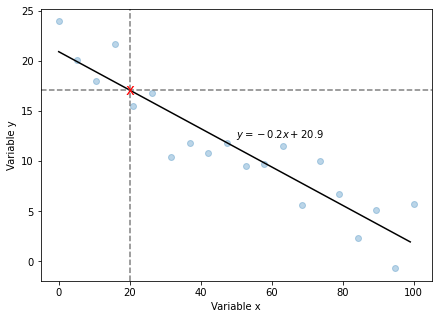

In [ ]:
""" Using Sklearn and the ML approach """
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
import random
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt, seaborn as sns
import numpy as np

# Generate semi-random dataset
dataset = pd.DataFrame({
	'Variable_x': np.linspace(0, 100, 20), 
	'Variable_y': [i + random.uniform(-5, 5) for i in range(20, 0, -1)]
})
dataset['Variable_y']

# Data Scatterplot
plt.figure(figsize=(7,5))
plt.scatter(dataset['Variable_x'], dataset['Variable_y'], alpha=0.3 )
plt.xlabel('Variable x'); plt.ylabel('Variable y')

# Linear Regression
model = LinearRegression()
# model.fit(lung[['Exposure']], lung['PEFR'])
model.fit(dataset[['Variable_x']], dataset['Variable_y'])
linreg_intercept = model.intercept_
linreg_coef = model.coef_[0]
print(f"Intercept: {linreg_intercept:.3f}")
print(f"Coefficient exposure: {linreg_coef:.3f}")

x_regline = np.arange(0, 100, 1)
plt.plot(x_regline, linreg_coef*x_regline + linreg_intercept, color='black')
plt.text(50, model.predict([[50]])[0] +1, rf'$y = {linreg_coef:.1f}x + {linreg_intercept:.1f}$')

# Prediction of a specified value
x_value = 20
predicted_y = model.predict([[x_value]])[0]; print(predicted_y)
plt.text(x_value, predicted_y, 'x', size=15, color='red', ha='center', va='center')
plt.axhline(predicted_y, color='grey', linestyle='dashed')
plt.axvline(x_value, color='grey', linestyle='dashed')

Intercept: 1.147
Coefficient exposure: 0.745
R^2 score: 0.57


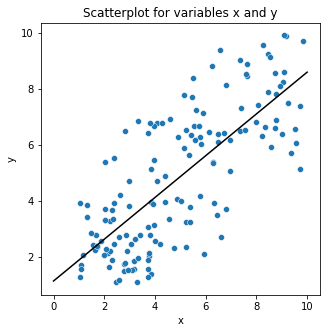

In [ ]:
# Sklearn, but from two vectors

import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 
N = 3*50
x = [random.uniform(1,4) for i in range(int(N/3))] + [random.uniform(2,7) for i in range(int(N/3))] + [random.uniform(5,10) for i in range(int(N/3))]
y = [random.uniform(1,4) for i in range(int(N/3))] + [random.uniform(2,7) for i in range(int(N/3))] + [random.uniform(5,10) for i in range(int(N/3))]

plt.figure(figsize=(5,5))
sns.scatterplot(x=x, y=y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatterplot for variables x and y')

model = LinearRegression()
# features, even if there's only one, should be in the format: [[value],[value],[value],...]
x_proc = [[i] for i in x]
model.fit(x_proc, y)
intercept, coef = model.intercept_, model.coef_[0]
print(f"Intercept: {intercept:.3f}")
print(f"Coefficient exposure: {coef:.3f}")
x_regline = np.arange(0,11,1)
sns.lineplot(x=x_regline, y=coef*x_regline + intercept, color='black');
y_true, y_pred = y, [ coef*i + intercept for i in x ]
r2_score = r2_score( y_true=y_true, y_pred=y_pred )
print(f"R^2 score: {r2_score:.2f}")


In [ ]:
"""Using TensorFlow"""

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib
import tensorflow.compat.v2.feature_column as fc
import tensorflow as tf


In [ ]:
# load dataset
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')
print(dftrain.columns)
print(dftrain.shape)
dftrain.head()


Index(['survived', 'sex', 'age', 'n_siblings_spouses', 'parch', 'fare',
       'class', 'deck', 'embark_town', 'alone'],
      dtype='object')
(627, 10)


,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [ ]:
y_train, y_eval = dftrain.pop('survived'), dfeval.pop('survived')

<AxesSubplot:>

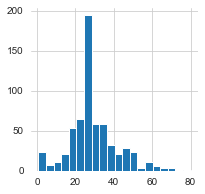

In [ ]:
dftrain['age'].hist(bins=20, figsize=(3,3))

<AxesSubplot:>

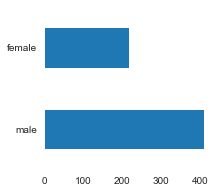

In [ ]:
dftrain['sex'].value_counts().plot(kind='barh', figsize=(3,3))

In [ ]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck', 'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
	vocabulary = dftrain[feature_name].unique()
	feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
	feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

In [ ]:
# Epoch - the number of times the model will see the dataset. 

def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
    if shuffle:
      ds = ds.shuffle(1000)
    ds = ds.batch(batch_size).repeat(num_epochs) # Split the dataset into batches of 32 and repeat process for number of epochs
    return ds
  return input_function

train_input_fn = make_input_fn(dftrain, y_train)
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)

linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns);
linear_est.train(train_input_fn);
result = linear_est.evaluate(eval_input_fn);

# clear_output() # clear console output
print(result['accuracy'])
print(result)


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\evgen\\AppData\\Local\\Temp\\tmp_rzcc01z', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
Use Variable.read_v

In [ ]:
result = list( linear_est.predict(eval_input_fn) );

i = 2
probability_survival = result[i]['probabilities'][1]
probability_death = result[i]['probabilities'][0]
print(dfeval.loc[i])
print(f"Actual survivability: {y_eval.loc[i]}")
print(f"Probability of survival: {probability_survival:.3f}")
print(f"Probability of death: {probability_death:.3f}")

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\evgen\AppData\Local\Temp\tmp_rzcc01z\model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
sex                        female
age                          58.0
n_siblings_spouses              0
parch                           0
fare                        26.55
class                       First
deck                            C
embark_town           Southampton
alone                           y
Name: 2, dtype: object
Actual survivability: 1
Probability of survival: 0.808
Probability of death: 0.192


### Turi create

In [ ]:
!pip install numpy==1.18.1 maptlotlib==3.1.3 turicreate
import numpy as np
import matplotlib.pyplot as plt
import turicreate as tc



     ---------------------------------------- 12.8/12.8 MB 9.4 MB/s eta 0:00:00


ERROR: Ignored the following versions that require a different python version: 1.25.0 Requires-Python >=3.9; 1.25.0rc1 Requires-Python >=3.9; 1.25.1 Requires-Python >=3.9
ERROR: Could not find a version that satisfies the requirement maptlotlib==3.1.3 (from versions: none)
ERROR: No matching distribution found for maptlotlib==3.1.3


ModuleNotFoundError: No module named 'numpy'

## Multiple Linear

Equation taking into account multiple predictors. 

$$ Y = b_{0} + b_{1}X_{1} + b_{2}X_{2} + ... + b_{p}X_{p} + e $$

$$ \hat{y} = \theta_{0} + \theta_{1} x_{1} + \theta_{2} x_{2} + ... + \theta_{n} x_{n} $$
, where:
- $\hat{y}$ - the label to be predicted;
- $n$ - number of features;
- $x_{i}$ - the $i^{\text{th}}$ feature;
- $\theta_{j}$ is the $j^{\text{th}}$ model parameter ($\theta_{0}$ - bias, $\theta_{1}$ through $\theta_{n}$ - feature weights);

In [ ]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:

diabetes = datasets.load_diabetes()
diabetes
print(diabetes.data[:3])
print(diabetes.target[:3])
print(diabetes.feature_names)

df_diabetes = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df_diabetes['Target'] = pd.Series(diabetes.target)
print(df_diabetes['Target'].min(), df_diabetes['Target'].max())
df_diabetes

[[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990749 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632753 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06833155 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567042 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286131 -0.02593034]]
[151.  75. 141.]
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
25.0 346.0


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [ ]:
# Check correlation between predictors

columns = list(df_diabetes.columns)
print(columns)
print("Let's show highly-correlated variables:")
for i in range( len(columns)-2 ):
	for j in range( i+1, len(columns)-1 ):
		# print(columns[i], columns[j])
		correlation = df_diabetes[columns[i]].corr(df_diabetes[columns[j]])
		if correlation > 0.5:
			print(f"  {columns[i]} - {columns[j]}: {correlation}")


['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'Target']
Let's show highly-correlated variables:
  s1 - s2: 0.8966629578104894
  s1 - s4: 0.5422072805232411
  s1 - s5: 0.5155029243689462
  s2 - s4: 0.659816888666644
  s4 - s5: 0.6178589739937288


In [ ]:
diabetes_lm = LinearRegression()
predictors = ['bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
outcome = 'Target'
diabetes_lm.fit(df_diabetes[predictors], df_diabetes[outcome])

print(f'Intercept: {diabetes_lm.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(predictors, diabetes_lm.coef_):
	print(f' {name}: {coef}')

Intercept: 152.133
Coefficients:
 bmi: 557.8045372748204
 bp: 268.42101324125576
 s1: -707.369896708688
 s2: 411.84422838252107
 s3: 135.61557099951838
 s4: 126.87933681537558
 s5: 750.5044946417453
 s6: 43.781834248619134


In [ ]:
fitted = diabetes_lm.predict(df_diabetes[predictors])
RMSE = np.sqrt(mean_squared_error(df_diabetes[outcome], fitted))
r2 = r2_score(df_diabetes[outcome], fitted)
print(f'RMSE: {RMSE:.0f}')
print(f'r2: {r2:.4f}')

RMSE: 54
r2: 0.5002


## Polynomial

Polynomial curve can be fitted to nonlinear data. 

Before fitting, decide on a shape: degree 1 - line; degree 2 - a parabola; degree 3 - a cubic. 




[1.78134581] [[0.93366893 0.56456263]]
a = 0.5645626336170753, b = 0.9336689322536067, c = 1.7813458120291457


Text(0.5, 1.0, 'Fitting non-linear data with a 2nd degree polynomial')

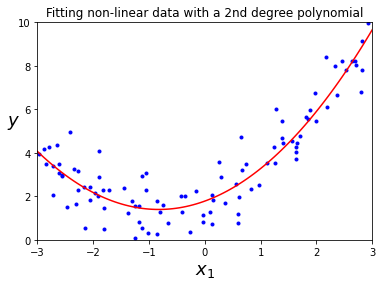

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

### Non-linear data based on quadratic equation
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
### y = ax^2 + bx + c
### a=0.5, b=1, c=2
### y = 0.5x^2 + 1x + 2 + gaussian noise
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])


poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new

### Option 1 (by hand)
print(lin_reg.intercept_, lin_reg.coef_)
a = lin_reg.coef_[0][1]
b = lin_reg.coef_[0][0]
c = lin_reg.intercept_[0]
print(f"a = {a}, b = {b}, c = {c}")

plt.plot(X_new, a * X_new**2 + b * X_new + c , 'r-')
plt.title("Fitting non-linear data with a 2nd degree polynomial")

### Option 2 (automatically)
# X_new_poly = poly_features.transform(X_new)
# y_new = lin_reg.predict(X_new_poly)
# plt.plot(X_new, y_new, 'g-')


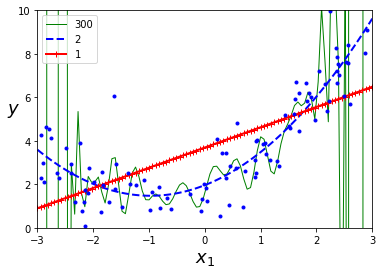

In [ ]:
"""
The experiment below shows fitting data with polynomials of
degrees 1, 2, and 300. We can see that for this non-linear data,
- 300-degree POlynomial regression model overfits;
- Linear model (degree 1) underfits.

"""

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
X_new=np.linspace(-3, 3, 100).reshape(100, 1)

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
# save_fig("high_degree_polynomials_plot")
plt.show()

## Residuals plot



Intercept: 1.339
Coefficient exposure: 0.739
R^2 score: 0.53
Intercept: 0.207
Coefficient exposure: 0.950
R^2 score: 0.92


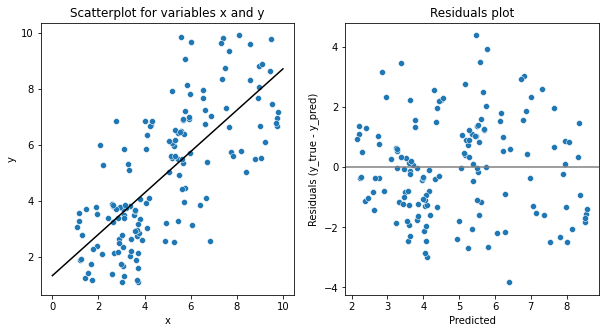

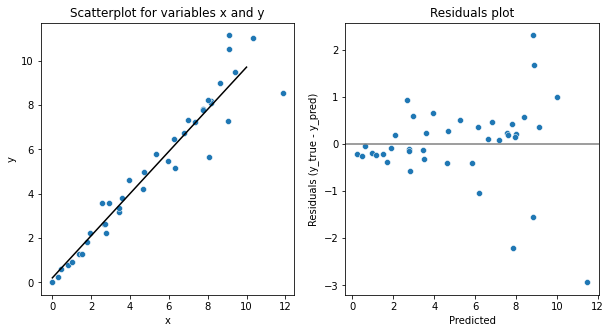

In [ ]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def plot_plot_and_residuals(x, y):
	plt.figure(figsize=(10,5))
	plt.subplot(1,2,1)
	sns.scatterplot(x=x, y=y)
	plt.xlabel('x')
	plt.ylabel('y')
	plt.title('Scatterplot for variables x and y')

	model = LinearRegression()
	# features, even if there's only one, should be in the format: [[value],[value],[value],...]
	x_proc = [[i] for i in x]
	model.fit(x_proc, y)
	intercept, coef = model.intercept_, model.coef_[0]
	print(f"Intercept: {intercept:.3f}")
	print(f"Coefficient exposure: {coef:.3f}")
	x_regline = np.arange(0,11,1)
	sns.lineplot(x=x_regline, y=coef*x_regline + intercept, color='black');
	y_true, y_pred = y, [ coef*i + intercept for i in x ]
	r2 = r2_score( y_true=y_true, y_pred=y_pred )
	print(f"R^2 score: {r2:.2f}")

	# Residuals plot
	residuals = [i-j for i,j in zip(y_true, y_pred)]
	# plt.figure(figsize=(5,5))
	plt.subplot(1,2,2)
	sns.scatterplot( x=y_pred, y=residuals )
	plt.xlabel('Predicted'); plt.ylabel('Residuals (y_true - y_pred)')
	plt.axhline(0, color='grey')
	plt.title('Residuals plot')

# High variability
N = 3*50
x = [random.uniform(1,4) for i in range(int(N/3))] + [random.uniform(2,7) for i in range(int(N/3))] + [random.uniform(5,10) for i in range(int(N/3))]
y = [random.uniform(1,4) for i in range(int(N/3))] + [random.uniform(2,7) for i in range(int(N/3))] + [random.uniform(5,10) for i in range(int(N/3))]
plot_plot_and_residuals(x,y)

# Low variability
x = np.linspace(0,10,40)
y = x
x = [i*random.uniform(0.8,1.2) for i in x]
y = [i*random.uniform(0.8,1.2) for i in y]
plot_plot_and_residuals(x,y)

# Supervised ML: Classification

## Discrete perceptron

Discrete perceptron can be used for classification using linear model. Please see `_4_ML_DL_CV.ipynb`.


## Logistic regression (continuous perceptron)

Logistic regression - continuous perceptron uses the sigmoid function to calculate the output. 

Prediction - first calculates weighted sum of the input features, which is then passed through a sigmoid function to produce an output between 0 and 1:

$$ t = \sum_{i=1}^{n} w_{i} x_{i} + b $$

$$ \hat{y} = p = \sigma(t) = \cfrac{1}{1 + e^{-t}}$$


Returns a float within the $[0,1]$ range. 
- Close to $0$ - more like "No", 
- close to $0.5$ - neutral, 
- close to $1$ - more like "Yes".

Therefore, it is a <u>binary classifier</u>.

Uses sigmoid function. 

Most widely-used error functions are square error and (even better) log loss, both coming from regression error functions.

Example of log loss function for a data point with label $y=0$ and predicted label $y=0.953$:

$\text{log loss } = -0 \times ln(0.953) - (1-0) \times ln(0.047) = - ln(0.047)$

---

**Pseudocode for the Logistic Regression Algorithm**: 

<u>As input in each epoch, we have</u>:
- A logistic classifier with weights $a$, $b$, and $c$
- A point with coordinates $(x_{1}, x_{2})$ and label $y$;
- Learning rate $\eta$

<u>Output</u>:
- A continuous perceptron with new values for weights $a'$, $b'$ and bias $c'$

<u>Procedure</u>:
- Start with random values for weights and bias of perceptron classifier;
- For many iterations / epochs:
  - Make a prediction: $ \hat{y} = sigmoid(ax_{1} + bx_{2} + c) $
  - Return new perceptron
    - *Note that $y = {0,1}$, $\hat{y} = [0,1]$*
    - If the line classifies a data point correctly, move the line away to the point (to place the correct predictions deeper into the prediction zone for this correctly-predicted class); 
    - If the line misclassifies a data point, adjust the weights and biases a little so that the classification line moves closer to the data point
    - In both scenarios, use the following equations to adjust weights and biases:

$$ a' = a + \eta(y-\hat{y}) x_{1} $$
$$ b' = b + \eta(y-\hat{y}) x_{2} $$
$$ c' = c + \eta(y-\hat{y}) $$

- Now the error should be a little smaller.


### 1 (by hand)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import utils
import random

<Axes: xlabel='feature 1', ylabel='feature 2'>

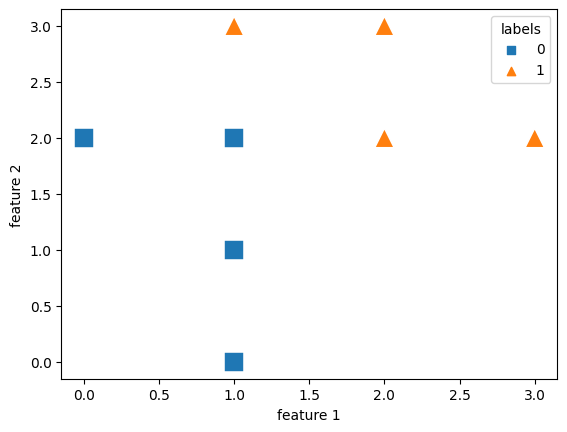

In [2]:


features = np.array([[1,0],[0,2],[1,1],[1,2],[1,3],[2,2],[2,3],[3,2]])
labels = np.array([0,0,0,0,1,1,1,1])

# Visualise the dots
df = pd.DataFrame({
	'feature 1': features[:,0],
	'feature 2': features[:,1],
	'labels': labels
})
df

sns.scatterplot( data=df, x='feature 1', y='feature 2', style='labels', s=200, hue='labels', markers={0:"s", 1:"^"} )


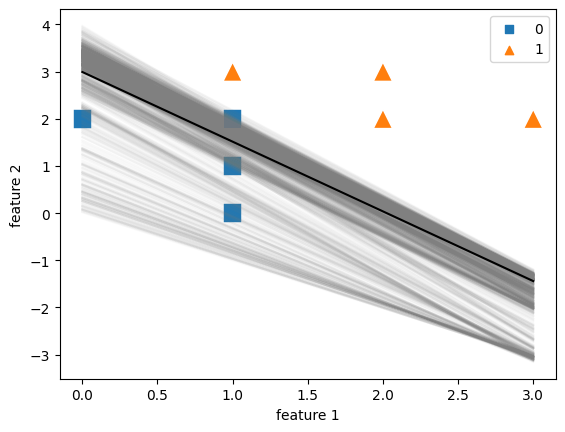

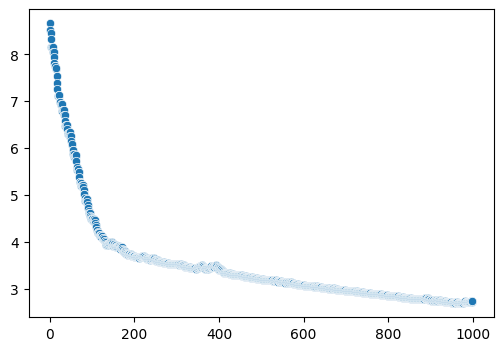

In [3]:
import utils, random

def sigmoid(x):
	"""
	the Sigmoid activation function
	"""
	return np.exp(x) / (1 + np.exp(x))

def score(weights, bias, features):
	"""
	dot product is like product between 
	vectors (x1,x2,...,xn) and (w1,w2,...,wn) = w1x1 + w2x2 + ... + wnxn
	"""
	return np.dot(weights, features) + bias

def prediction(weights, bias, features):
	"""
	predictions are sigmoid activation function
	applied to the score
	"""
	return sigmoid(score(weights, bias, features))

def log_loss(weights, bias, features, label):
	"""
	loss function
	"""
	pred = prediction(weights, bias, features)
	return -label*np.log(pred) - (1-label)*np.log(1-pred)

def total_log_loss(weights, bias, features, labels):
	"""
	sum log loss for the entire dataset
	"""
	total_error = 0
	for i in range(len(features)):
		total_error += log_loss(weights, bias, features[i], labels[i])
	return total_error

def logistic_trick(weights, bias, features, label, learning_rate=0.01):
	pred = prediction(weights, bias, features)
	for i in range(len(weights)):
		weights[i] += (label-pred)*features[i]*learning_rate
		bias += (label-pred)*learning_rate
	return weights, bias

def logistic_regression_algorithm(features, labels, learning_rate=0.01, epochs=1000):
	sns.scatterplot( data=df, x='feature 1', y='feature 2', style='labels', s=200, hue='labels', markers={0:"s", 1:"^"} )
	weights = [1.0 for i in range(len(features[0]))]
	bias = 0.0
	errors = []
	for i in range(epochs):
		errors.append(total_log_loss(weights, bias, features, labels))
		j = random.randint(0, len(features)-1)
		weights, bias = logistic_trick(weights, bias, features[j], labels[j])
		# Plot
		x = np.arange(0, 4, 1)
		sns.lineplot( x=x, y=(-weights[0] * x - bias)/weights[1], color='grey', alpha=0.05 )
	sns.lineplot( x=x, y=(-weights[0] * x - bias)/weights[1], color='black' )
	plt.figure(figsize=(6,4))
	# print(errors)
	sns.scatterplot( x=[i for i in range(epochs)], y=errors )
	return weights, bias

weights, bias = logistic_regression_algorithm(features, labels, epochs=1000)



In [4]:
print(weights, bias)
print('-'*30)

def predict(weights, bias, X):
	x = np.dot( X, weights ) + bias
	y_hat = np.exp(x) / (1 + np.exp(x))
	print(y_hat)

predict(weights, bias, [[1,0], [1,3], [3,2]])

[1.108749556460074, 0.7502287083206923] -2.2455854224960032
------------------------------
[0.24290177 0.75284622 0.92963661]


### 2 (IMBD)

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [6]:
df = pd.read_csv('example_datasets/ML/IMDB_Dataset.csv')

def text_clean(text):
	text = text.lower()
	text = re.sub( '[,.?:\'"]', '', text )
	text = re.sub( '<br />', '', text )
	return text

df['proc'] = df['review'].apply( lambda x: text_clean(x) )

df.head()

,review,sentiment,proc
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,basically theres a family where a little boy (...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love in the time of money is a ...


In [7]:
Independent_var = df['proc']
Dependent_var = df['sentiment']

IV_train, IV_test, DV_train, DV_test = train_test_split(Independent_var, Dependent_var, test_size=0.1, random_state=225)

print( f"IV_train: {len(IV_train)} | DV_train: {len(DV_train)}" )
print( f"IV_test: {len(IV_test)} | DV_test: {len(DV_test)}" )

IV_train: 45000 | DV_train: 45000
IV_test: 5000 | DV_test: 5000


In [8]:
tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver = 'lbfgs')

In [9]:
model = Pipeline([('vectorizer', tvec),('classifier',clf2)])
model.fit(IV_train, DV_train)

predictions = model.predict(IV_test)

confusion_matrix(predictions, DV_test)

c:\Users\evgen\miniconda3\envs\data-science\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[2241,  233],
       [ 265, 2261]], dtype=int64)

In [10]:

print(f"Accuracy: {accuracy_score(predictions, DV_test)}")
print(f"Precision: {precision_score(predictions, DV_test, average='weighted')}")
print(f"Recall: {recall_score(predictions, DV_test, average='weighted')}")


Accuracy: 0.9004
Precision: 0.9004788607422379
Recall: 0.9004


In [11]:
example = ['It was bad. I expected this movie to be much more exciting, but in the end it was disappointing.']
result = model.predict(example)
print(result)

['negative']


In [20]:
print(len(clf2.coef_[0]))


169186


### 3 (cancer)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split


In [ ]:
brca = load_breast_cancer()
print(brca.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
X = pd.DataFrame(columns=brca.feature_names, data=brca.data)
y = brca.target

X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
# Features that we want to predict 
print(brca.target_names)
print(y)

['malignant' 'benign']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

clf = LogisticRegression(random_state=1)

clf.fit(X_train, y_train)
clf.predict(X_test)

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0])

### Example

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

iris = datasets.load_iris()
print( list(iris.keys()) )

X = iris['data']
print("features shape: ", X.shape)

### binary classifier, so 1 = Virginica, 0 = any other species of Iris
y = iris['target']
print("labels shape: ", y.shape)
print(y)

y2 = y[y != 2]
print("labels (sliced) shape: ", y2.shape)

X2 = X[y != 2]
print("features (sliced) shape: ", X2.shape)

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']
features shape:  (150, 4)
labels shape:  (150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
labels (sliced) shape:  (100,)
features (sliced) shape:  (100, 4)


In [ ]:


log_reg = LogisticRegression()
log_reg.fit(X2, y2)

values = [[1.5, 3, 2, 1.7]]

### return label predicted
preds = log_reg.predict(values)
print(preds)

### return probabilities for each label category
probabilities = log_reg.predict_proba(values)
print(probabilities)


[0]
[[0.91826923 0.08173077]]


## naive Bayes

This algorithms estimates the probability of observing an outcome of interest $Y = i$, given a set of features / predictors.

Exact / complete Bayesian classification: finding all the records that are exactly like the new record to be classified, with the exact values for all predictors / features, and for those records calculating which class is the most probable. The problem with this lies in a very small likelihood of the exact matches existing in the dataset, i.e. the data with the exactly equal feature values. 

Suppose that we have a dataset with features (predictors) $X$ having values $X_{1}, X_{2}, ..., X_{p}$, and a label ($Y=i$). Formula for the exact Bayes probability to calculate probability for a class given a set of features:

$$ P(Y=i|X_{1},X_{2},...,X_{p}) = \frac{P(Y=i)P(X_{1},X_{2},...,X_{p}|Y=i)}{ P(Y=0)P(X_{1},X_{2},...,X_{p}|Y=0) + P(Y=1)P(X_{1},X_{2},...,X_{p}|Y=1) } $$


**The Naive Bayes solution**: we make a simplifying assumption that the *exact conditional probability is well approximated by the product of individual conditional probabilities*, iow that the probability of each feature is independent of the others: $P(X_{1},X_{2},...,X_{p}|Y=i) \approx P(X_{1}|Y=i)...P(X_{p}|Y=i)$

$$ P(Y=i|X_{1},X_{2},...,X_{p}) = \frac{ P(Y=i)P(X_{1}|Y=i)...P(X_{p}|Y=i) }{ P(Y=0)P(X_{1}|Y=0)...P(X_{p}|Y=0) + P(Y=1)P(X_{1}|Y=1)...P(X_{p}|Y=1) } $$

The standard naive Bayes algorithm uses *categorical* features. To use numerical features, they can be processed by e.g. binning;


### Scikit-learn (more labels)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB

df = pd.DataFrame({
	'Colour': ['red' for i in range(10)]+['orange', 'green', 'green'] +    ['green' for i in range(5)]+['yellow' for i in range(8)] +   ['yellow' for i in range(11)]+['green' for i in range(2)],
	'Shape': ['round' for i in range(13)] +                                ['oval' for i in range(13)] +                                ['crescent' for i in range(13)],
	'Fruit': ['apple' for i in range(13)] +                                ['pear' for i in range(13)] +                                ['banana' for i in range(13)]
})

df.head()

X = pd.get_dummies(df[['Colour', 'Shape']], prefix='', prefix_sep='')
print(X.head(1))
y = df[['Fruit']]
naive_model = MultinomialNB(alpha=0.01, fit_prior=True)
naive_model.fit(X, y)

# Predict
def add_to_empty_dataframe(df, data):
	""" This function is to ensure that the data that you want to predict
	is inputted in the same format as the data used for training """
	columns = list( df.columns )
	columns = { i:0 for i in columns }
	for i in data:
		columns[i] = 1
	df = df.append(columns, ignore_index=True);
	# print(df)
	return df


df_predict = pd.DataFrame([], columns=X.columns)
for i in [
	['green','round'],['green','round'], # Apple
	['yellow','oval'],['green','oval'], # Pear
	['yellow', 'crescent'],['green','crescent'] # Banana
	]:
	df_predict = add_to_empty_dataframe(df_predict, i)

df_predict

print( naive_model.predict(df_predict) )
print( f"Probabilties for {naive_model.classes_}:" )
print( naive_model.predict_proba(df_predict) )


   green  orange  red  yellow  crescent  oval  round
0      0       0    1       0         0     0      1
['apple' 'apple' 'pear' 'pear' 'banana' 'banana']
Probabilties for ['apple' 'banana' 'pear']:
[[9.97322685e-01 7.66581618e-04 1.91073329e-03]
 [9.97322685e-01 7.66581618e-04 1.91073329e-03]
 [9.58586200e-07 1.05540341e-03 9.98943638e-01]
 [3.08186255e-04 3.08186255e-04 9.99383627e-01]
 [6.97737864e-07 9.99440414e-01 5.58888029e-04]
 [7.66581618e-04 9.97322685e-01 1.91073329e-03]]


c:\Users\evgen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\evgen\AppData\Local\Temp\ipykernel_14980\1729730501.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(columns, ignore_index=True);
C:\Users\evgen\AppData\Local\Temp\ipykernel_14980\1729730501.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(columns, ignore_index=True);
C:\Users\evgen\AppData\Local\Temp\ipykernel_14980\1729730501.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df

### 1 (by hand)

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
emails = pd.read_csv('https://raw.githubusercontent.com/luisguiserrano/manning/master/Chapter_8_Naive_Bayes/emails.csv')
emails.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [ ]:
def process_email(text):
	text = text.lower()
	return list(set(text.split()))

emails['words'] = emails['text'].apply(process_email)
emails.head()

,text,spam,words
0,Subject: naturally irresistible your corporate...,1,"[information, is, nowadays, distinctive, draft..."
1,Subject: the stock trading gunslinger fanny i...,1,"[muzo, is, plain, chameleon, boar, yes, ramble..."
2,Subject: unbelievable new homes made easy im ...,1,"[is, hearing, way, homes, the, ask, advantage,..."
3,Subject: 4 color printing special request add...,1,"[information, version, is, 8090, &, 5110, :, a..."
4,"Subject: do not have money , get software cds ...",1,"[is, me, are, t, compatibility, old, the, ende..."


In [ ]:
# Finding the priors
prior = sum(emails['spam']) / len(emails)
print(f"Priors: probability that an email is spam: {prior:.4f}")

# Finding the posterios with Bayes' theorem

## Create a dictionary called 'model', which records each word together with the number of appearances of the word in spam emails and in ham emails
model = {}
for index, email in emails.iterrows():
	for word in email['words']:
		if word not in model:
			model[word] = {'spam':1, 'ham':1} # Here we initialise the counts at 1, in order to prevent division by zero in the future
		if word in model:
			if email['spam']:
				model[word]['spam'] += 1
			else:
				model[word]['ham'] += 1

print(model['lottery'])
print(model['sale'])


Priors: probability that an email is spam: 0.2388
{'spam': 9, 'ham': 1}
{'spam': 39, 'ham': 42}


In [ ]:
# Implementing the naive Bayes algorithm
def predict_naive_bayes(email):
	total = len(emails) # Calculates the total number of emails, spam emails, and ham emails
	num_spam = sum(emails['spam'])
	num_ham = total - num_spam
	email = email.lower() # Proccess each email by turning it into a list of its words in lowercase
	words = set(email.split())
	spams = [1]
	hams = [1]
	for word in words:
		if word in model:
			# For each word, computes the conditional probability that an email containing that word is spam (or ham) as a ratio
			spams.append(model[word]['spam']/num_spam*total)
			hams.append(model[word]['ham']/num_ham*total)
	# Multiplies all the previous probabilities times the prior probability of the email being spam, and calls this prod_spams. 
	# Does a similar process for prod_hams
	prod_spams = np.compat.long(np.prod(spams)*num_spam)
	prod_hams =  np.compat.long(np.prod(hams)*num_ham)
	# Normalises these two probabilities to get them to add to one (using Bayes' theorem) and return the result
	return prod_spams/(prod_spams+prod_hams)



In [ ]:
print( predict_naive_bayes('Hi mom how are you?') );
print( predict_naive_bayes('meet me at the lobby of the hotel at nine am') )
print( predict_naive_bayes("buy cheap lottery easy money now") )
print( predict_naive_bayes('We have a business meeting at 9am in the meeting room') )


0.13743544730963977
6.964603508395965e-05
0.999973472265966
0.0006807487677137641


## SVM

SVM (support vector machine) has hyperplane for the decision boundary AND two solid lines / hyperplanes at each sides (support vectors). Thus, SVM has two goals - separate the two classes with decision boundary AND stay as far from the training instances in each class as possible. In a sense, SVM tries to fit the widest possible rectangle between the classes. 

Belongs to a family of generalised linear classifiers. 

<img src="Media/svm_2.png" width=400>

---

Error function:

we try to maximie two things: the classification of the points and the distance between the lines. 

$$Error = C*classificationError + distanceError$$
, where $C$ - the C parameter. 

Classification error - sum of absolute values of the two equations. With increasing w1 and w2, the error becomes smaller. 

$$ distanceError = \frac{2}{\sqrt{w_{1}^{2} + w_{2}^{2}}} $$

C parameter:
- C is large, the error formula dominated by classification error, focusing more on this error; 
- C is small, focus on distance error. 

---

Features of SVM:
- SVM is useful for linear classifiers and (with the use of kernel method) nonlinear classifiers. 
- SVM is very sensitive to feature scales, therefore, standardization is very important

---

**Hard Margin Classification** - we say that all instances have to be 100% separated by the decision boundary. 
- Only works with data that is linearly separable.
- Sensitive to outliers



In [ ]:
# Effective when working with many features
# many kernel functions

# kernels (line) can be linear (straight line), polynomial (curves), exponential, RBF


In [ ]:
from sklearn import datasets
import numpy as np, pandas as pd
from sklearn.model_selection import train_test_split


In [ ]:
# Let's use the iris dataset
# and classify on whether the plant is vericosa, or other

iris = datasets.load_iris()
print(iris.DESCR)

In [ ]:

# split the data into features and labels
X, y = iris.data, iris.target
print(X.shape, y.shape)

classes = ['Iris Setosa', 'Iris Versicolor', 'Iris Virginica']

from sklearn import svm
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# create a model object
model = svm.SVC()
model.fit(X_train, y_train)
print(model)

from sklearn.metrics import accuracy_score
# metrics
predictions = model.predict(X_test)
acc = accuracy_score(y_test, predictions)
print("Predictions: ", predictions)
print("Actual:      ", y_test)
print(f"Accuracy: {acc:.3f}")

for i in range(len(predictions)):
	print(classes[predictions[i]])

##### Proj 1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
import utils

In [ ]:
linear_data = pd.read_csv('https://raw.githubusercontent.com/luisguiserrano/manning/master/Chapter_11_Support_Vector_Machines/linear.csv', index_col=0)
linear_data.head()

In [ ]:
features = np.array(linear_data[['x_1', 'x_2']])
labels = np.array(linear_data['y'])
sns.scatterplot( data=linear_data, x='x_1', y='x_2', hue='y' )

In [ ]:
# Default C
svm_linear = SVC(kernel='linear')
svm_linear.fit(features, labels)
print(f"Default C | Accuracy: {svm_linear.score(features,labels):.3f}")

# C = 0.01
svm_c_001 = SVC(kernel='linear', C=0.01)
svm_c_001.fit(features, labels)
print("C = 0.01 | Accuracy:", svm_c_001.score(features, labels))


# C = 100
svm_c_100 = SVC(kernel='linear', C=100)
svm_c_100.fit(features, labels)
print("C = 100 | Accuracy:", svm_c_100.score(features, labels))


In [ ]:
# Now, training SVM with nonlinear boundaries - the kernel method

# A powerful method associated with SVM called the kernel method


In [ ]:
circular_data = pd.read_csv('https://raw.githubusercontent.com/luisguiserrano/manning/master/Chapter_11_Support_Vector_Machines/one_circle.csv', index_col=0)
features = np.array(circular_data[['x_1', 'x_2']])
labels = np.array(circular_data['y'])
circular_data.head()

In [ ]:
sns.scatterplot( data=circular_data, x='x_1', y='x_2', hue='y', s=80 )
# Circular dataset

In [ ]:
# Degree = 2
# We use degree of 2, because the equation of a circle is a polynomial of degree 2
# or, rather we use an oval shape
svm_degree_2 = SVC(kernel='poly', degree=2)
svm_degree_2.fit(features, labels)
print("Polynomial kernel of degree = 2")
print("Accuracy:", svm_degree_2.score(features, labels))
# utils.plot_model(features, labels, svm_degree_2)
print('-'*100)

# Degree = 4
# Like an oval with rounded edges
svm_degree_4 = SVC(kernel='poly', degree=4)
svm_degree_4.fit(features, labels)
print("Polynomial kernel of degree = 4")
print("Accuracy:", svm_degree_4.score(features, labels))
# utils.plot_model(features, labels, svm_degree_4)

In [ ]:
# What if there are two circles in the dataset?

In [ ]:
two_circles_data = pd.read_csv('https://raw.githubusercontent.com/luisguiserrano/manning/master/Chapter_11_Support_Vector_Machines/two_circles.csv', index_col=0)
features = np.array(two_circles_data[['x_1', 'x_2']])
labels = np.array(two_circles_data['y'])
two_circles_data.head()

In [ ]:
# gamma = 0.1
# Underfits a litte, because it thinks the boundary is one oval
svm_gamma_01 = SVC(kernel='rbf', gamma=0.1)
svm_gamma_01.fit(features, labels)
print("Gamma = 0.1")
print("Accuracy:", svm_gamma_01.score(features, labels))
utils.plot_model(features, labels, svm_gamma_01)

# gamma = 1
# Good model that captures the data well
# Best gamma
svm_gamma_1 = SVC(kernel='rbf', gamma=1)
svm_gamma_1.fit(features, labels)
print("Gamma = 1")
print("Accuracy:", svm_gamma_1.score(features, labels))
utils.plot_model(features, labels, svm_gamma_1)

# gamma = 10
# Overfit, as it encircles the outliers
svm_gamma_10 = SVC(kernel='rbf', gamma=10)
svm_gamma_10.fit(features, labels)
print("Gamma = 10")
print("Accuracy:", svm_gamma_10.score(features, labels))
utils.plot_model(features, labels, svm_gamma_10)

# gamma = 100
# Serious overfitting, where it surrounds each triangle with a small circular region
svm_gamma_100 = SVC(kernel='rbf', gamma=100)
svm_gamma_100.fit(features, labels)
print("Gamma = 100")
print("Accuracy:", svm_gamma_100.score(features, labels))
utils.plot_model(features, labels, svm_gamma_100)



## KNN

K-Nearest Neighbors (KNN).

Algorithm:
- Find K records with the similar features' values;
- To classify a new record, find the most prevalent class in those similar features;

The closeness (similarity, nearness) of the two records (vectors) with features $(x_{1},x_{2},...,x_{n})$ and $(u_{1},u_{2},...,u_{n})$ can be measured in different ways:
| Metric | Description | Formula |
| - | - | - |
| Euclidean distance | Straight-line (crow's fly) distance between two points. Linear distance between two points in a multi-dimensional space. | $$ \sqrt{(x_{1}-u_{1})^{2} + (x_{2}-u_{2})^{2} +...+(x_{n}-u_{n})^{2}} $$ |
| Manhattan distance | Distance between two points if calculated going through each dimension (feature) at a time. | $$ \|x_{1}-u_{1}\| + \|x_{2}-u_{2}\| + ... + \|x_{p}-u_{p}\| $$ |

The strategy of choosing K is very important. Normally, any $K>1$ is a good idea.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame({
	'Income'
})


## Decision trees

Decision tree: a ML model based on binary tree (yes-no answer). 

The algorithm to build a decision tree:
1. Figure out which data is the most useful to decide which app to recommend; 
2. This features splits the data into two smaller datasets; 
3. Repeat processes 1 and 2 for each of the two smaller datasets; 
4. Check homogeneity;

As we create rules for splitting the data, we need a way to measure **homogeneity**, or class purity inside of each partition.The following measures are useful:
| Measure | Description | Formula | Example |
| - | - | - | - |
| Accuracy | Split differently by the two features and check accuracy by recommending the most common in each group. **NOT a good measure for impurity**. | | |
| Gini impurity index | The measure of diversity. Can be interpreted as the probability that if we pick two random elements out of the set, they belong to different classes. | In a set with $m$ elements and $n$ classes, with $a_{i}$ elements belonging to the $i$-th class, the Gini impurity index is: $$ Gini = 1 - p_{1}^{2} - p_{2}^{2} - ... - p_{n}^{2} $$, where $p_{i} = \frac{a_{i}}{m}$. | E.g. Gini of the following set `[red, red, red, red, red, red, red, red, blue, blue]` is the following: $$ Gini = 1 - (\frac{8}{10})^{2} - (\frac{2}{10})^{2} = 0.32 $$ |
| Entropy of information | What is the probability that, by picking an item from the set, recording its value, and returning it to the pile, we get the exact sequence that defines the original set? | In a set with $m$ elements and $n$ classes, with $a_{i}$ elements belonging to the $i$-th class, the entropy is: $$ Entropy = -p_{1} log_{2}(p_{1}) - p_{2} log_{2}(p_{2}) - ... - p_{n} log_{2}(p_{n}) $$, where $ p_{i} = \frac{a_{i}}{m} $ | E.g. set `[red, red, red, red, red, red, red, red, blue, blue]`, $$ P(8r, 2b) = (\frac{8}{10})^{2} (\frac{2}{10})^{2} = 0.006711 $$ |



The above approaches each, can be summed up by average (if groups are of equal sizes) or weighted means (if unequally-sized groups). 



In [ ]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.tree import DecisionTreeClassifier

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/luisguiserrano/manning/master/Chapter_9_Decision_Trees/Admission_Predict.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
data['Admitted'] = data['Chance of Admit'] >= 0.75
data = data.drop(['Chance of Admit'], axis=1)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admitted
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,True
2,324,107,4,4.0,4.5,8.87,1,True
3,316,104,3,3.0,3.5,8.00,1,False
4,322,110,3,3.5,2.5,8.67,1,True
5,314,103,2,2.0,3.0,8.21,0,False


In [ ]:
features = data.drop(['Admitted'], axis=1)
labels = data['Admitted']

# Training a decision tree
dt = DecisionTreeClassifier()
dt.fit(features, labels)
print( dt.predict(features[0:5]) )
print( dt.score(features, labels) ) # Score is 100%, so this model probably overfits
# If we plot this tree, the depth will be 10


[ True  True False  True False]
1.0


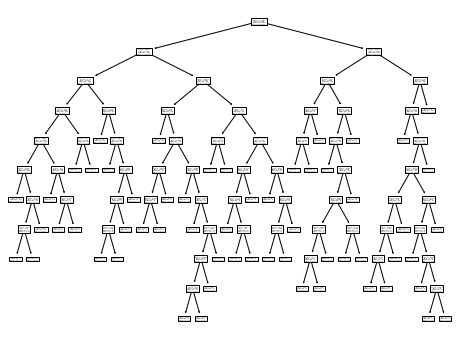

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(8,6));
plot_tree(dt);

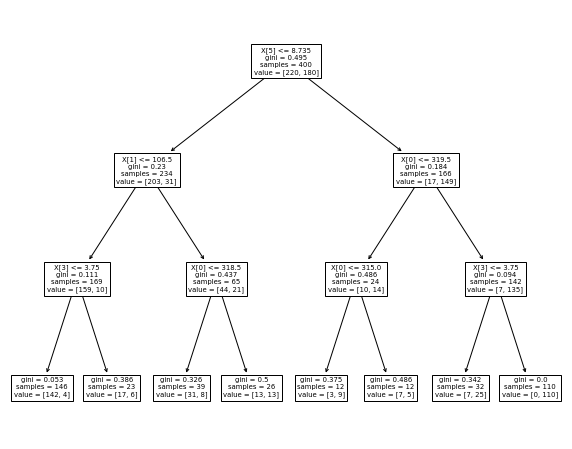

In [ ]:
# Let's set some hyperparameters in Scikit-learn to prevent overfitting

"""
max_depth: the maximum allowed depth
max_features: the maximum number of features considered at each split; 
min_impurity_decrease: the decrease in impurity must be higher than this threshold to split a node
min_impurity_split: when the impurity at a node is lower than this threshold, the node becomes a leaf
min_samples_leaf: the minimum number of samples required for a leaf node; 
min_samples_split: the minimum number of samples required to split a node; 
"""

dt_smaller = DecisionTreeClassifier(
	max_depth=3, 
	min_samples_leaf=10, 
	min_samples_split=10
)
dt_smaller.fit(features, labels)

plt.figure(figsize=(10,8))
plot_tree(dt_smaller);

In [ ]:
dt_smaller.predict([[320, 110, 3, 4.0, 3.5, 8.9, 0]]) # The model (tree) predicts that this student will be admitted


c:\Users\evgen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([ True])

## Ensemble

Ensemble learning: aggregating the predictions of many weaker predictors. 

Features:
- Ensemble methods work best when the predictors are independent from one another and make very different mistakes. Can be achieved by using different algorithms, using subsets of training data. 

Ensemble methods:
- Use different training algorithms on the same dataset
- PARALLEL (multiple models are trained in parallel to get final stable model). Use the same training algorithm, but trained on different random subsets of the training set.
  - **Bagging**: bootstrap aggregating. WITH replacement. 
    - Out-of-bag evaluation: using the roughly 37% of the training data that is likely not used in bootstrap sampling for validation. 
  - **Pasting**: WITHOUT replacement.
- SEQUENTIAL (multiple models are trained in sequence to rectify mistakes of previous models):
  - **Boosting**: building these models in a smarter way by picking each model strategically to focus on the previous models' mistakes. 
    - AdaBoost: Here, each new predictor corrects its predecessor by paying more attention to the training instances that the predecessor underfit by increasing weights of those erroneous data instances;
    - Gradient boosting: 
    - XGBoost.
- STACKING (a meta-model is trained on predictions of other models):
  - **Stacking**: stacked generalization; instead of using hard voting, we train a model to perform this aggregation. So, we have three predictors predicting dataset's class, and then the final predictor (blender, meta learner) further in the chain making a final prediction based on the input predictions. 

Ensemble methods combine several weak learners (models) into a strong learner (model). 

**Voting classifier**

Aggregating results of many weak classifiers of different types. 

Same training data, but it is used by different types of algorithms. 

<img src="Media/voting-classifier.png" width="400px" height="250px">
<img src="Media/voting-classifier2.png" width="400px" height="250px">

**Random forest**

Train decision trees on different random subsets of the training data, and for predicting any data point, we take the most prevalent prediction from predictions of each smaller decision tree. 

Most often trained via the bagging method (but sometimes pasting).


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import utils

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

np.random.seed(0)



In [ ]:
emails = np.array([
    [7,8,1],
    [3,2,0],
    [8,4,1],
    [2,6,0],
    [6,5,1],
    [9,6,1],
    [8,5,0],
    [7,1,0],
    [1,9,1],
    [4,7,0],
    [1,3,0],
    [3,10,1],
    [2,2,1],
    [9,3,0],
    [5,3,0],
    [10,1,0],
    [5,9,1],
    [10,8,1],
])
spam_dataset = pd.DataFrame(data=emails, columns=["Lottery", "Sale", "Spam"])
spam_dataset.head()

,Lottery,Sale,Spam
0,7,8,1
1,3,2,0
2,8,4,1
3,2,6,0
4,6,5,1


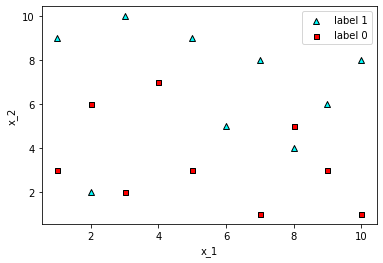

In [ ]:
features = spam_dataset[['Lottery', 'Sale']]
labels = spam_dataset['Spam']
utils.plot_points(features, labels)

In [ ]:
# An example of overfitting the decision tree classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=0)
decision_tree_classifier.fit(features, labels)
decision_tree_classifier.score(features, labels)

1.0

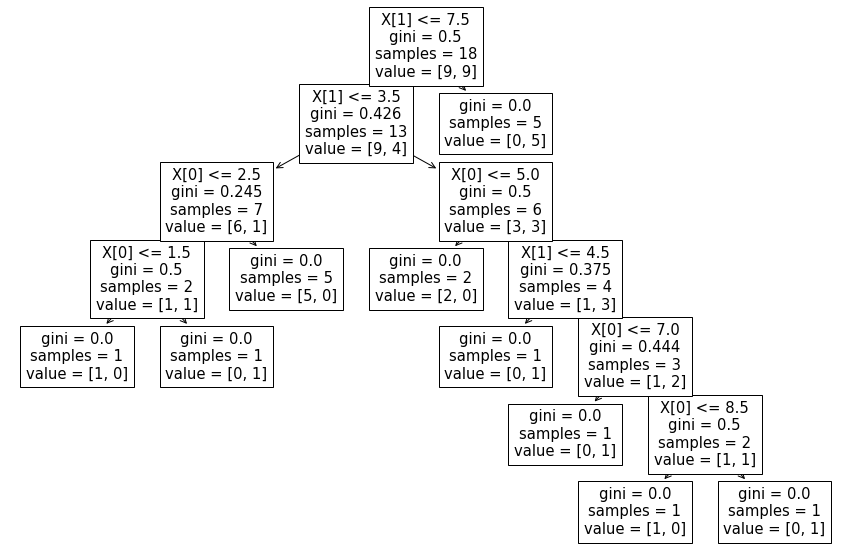

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15,10));
plot_tree(decision_tree_classifier);

c:\Users\evgen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


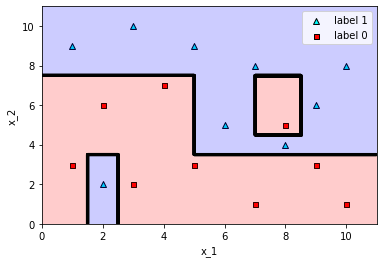

In [ ]:
utils.plot_model(features, labels, decision_tree_classifier)

In [ ]:
# Then, let's train a random forest to get a better fit

from sklearn.ensemble import RandomForestClassifier
random_forest_classifier = RandomForestClassifier(
	random_state=0, 
	n_estimators=5, # We want 5 weak learners / 5 trees
    max_leaf_nodes=16, # each tree is limited to max of 16 leaf nodes
	max_depth=1)
random_forest_classifier.fit(features, labels)
random_forest_classifier.score(features, labels)

0.8333333333333334

c:\Users\evgen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


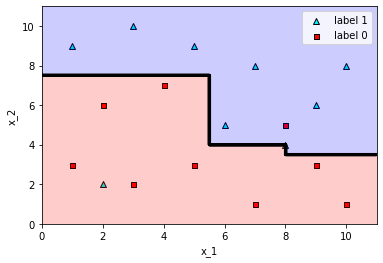

In [ ]:
utils.plot_model(features, labels, random_forest_classifier)

****************************** Estimator ******************************


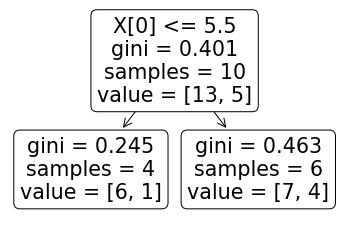

c:\Users\evgen\Desktop\Statistics_manual\utils.py:37: UserWarning: No contour levels were found within the data range.
  pyplot.contour(xx, yy, Z,colors = 'k',linewidths = 3)


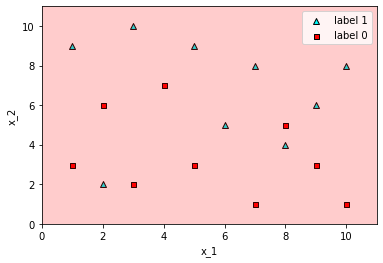

****************************** Estimator ******************************


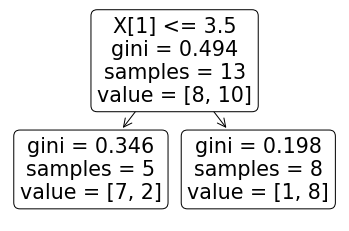

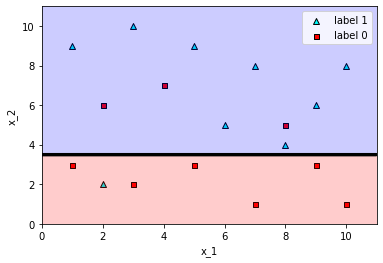

****************************** Estimator ******************************


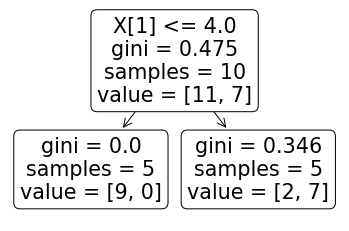

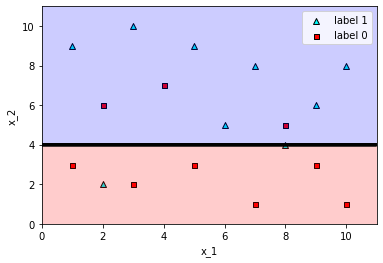

****************************** Estimator ******************************


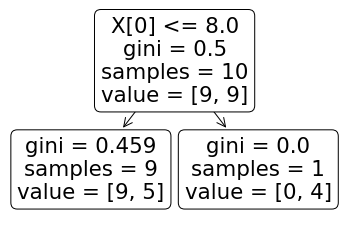

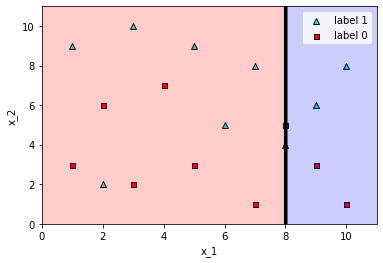

****************************** Estimator ******************************


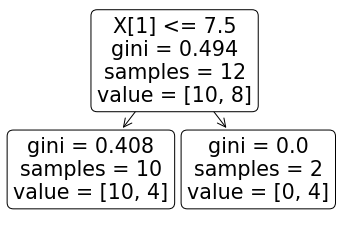

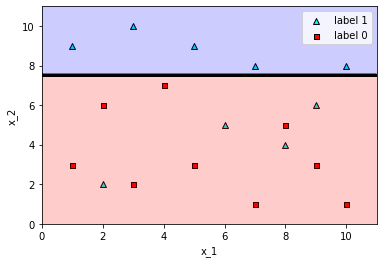

In [ ]:
for dt in random_forest_classifier.estimators_:
    print("*"*30, "Estimator", "*"*30)
    tree.plot_tree(dt, rounded=True)
    plt.show()
    utils.plot_model(features, labels, dt)
    plt.show()

# Below, we can see that the weak learner number 1 is not useful, as it simply classifies all points as ham


## classification with tensorflow

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

CSV_COLUMN_NAMES = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
SPECIES = ['Setosa', 'Versicolor', 'Virginica']

train_path = tf.keras.utils.get_file(
	'iris_training.csv', 'https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv'
)

test_path = tf.keras.utils.get_file(
	'iris_test.csv', 'https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv'
)

train = pd.read_csv(train_path, names=CSV_COLUMN_NAMES, header=0)
test = pd.read_csv(test_path, names=CSV_COLUMN_NAMES, header=0)
print(train.head())

train_y = train.pop('Species')
test_y = test.pop('Species')
train.head()

def input_fn(features, labels, training=True, batch_size=256):
	dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))
	# Shuffle and repeat if you are in training mode
	if training:
		dataset = dataset.shuffle(1000).repeat()
	return dataset.batch(batch_size)

my_feature_columns = []
for key in train.keys():
	my_feature_columns.append(tf.feature_column.numeric_column(key=key))

# deep neural network (DNN)
# Linear classifier 

classifier = tf.estimator.DNNClassifier(
	feature_columns=my_feature_columns,
	# Two hidden layers of 30 and 10 nodes respectively
	hidden_units = [30, 10],
	# The model must choose between 3 classes
	n_classes=3
)

classifier.train(
	input_fn= lambda: input_fn(train, train_y, training=True), 
	steps=5000
)

eval_result = classifier.evaluate(input_fn = lambda: input_fn(test, test_y, training=False))


   SepalLength  SepalWidth  PetalLength  PetalWidth  Species
0          6.4         2.8          5.6         2.2        2
1          5.0         2.3          3.3         1.0        1
2          4.9         2.5          4.5         1.7        2
3          4.9         3.1          1.5         0.1        0
4          5.7         3.8          1.7         0.3        0
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\evgen\\AppData\\Local\\Temp\\tmp6xidqhv1', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_dela

In [ ]:
print(f'Test set accuracy: {eval_result}')

Test set accuracy: {'accuracy': 0.93333334, 'average_loss': 0.3733698, 'loss': 0.3733698, 'global_step': 5000}


In [ ]:
def input_fn(features, batch_size=256):
	return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)

predict = {
	'SepalLength': [6.4],
	'SepalWidth': [2.8],
	'PetalLength': [5.6], 
	'PetalWidth': [2.2],
}

predictions = classifier.predict(input_fn=lambda: input_fn(predict))
for pred_dict in predictions:
	print(pred_dict)
	class_id = pred_dict['class_ids'][0]
	probability = pred_dict['probabilities'][class_id]
	print(f"Prediction is {SPECIES[class_id], 100*probability}")

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\evgen\AppData\Local\Temp\tmp6xidqhv1\model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
{'logits': array([-2.007372 ,  1.3968128,  2.7342505], dtype=float32), 'probabilities': array([0.00686296, 0.20650472, 0.78663236], dtype=float32), 'class_ids': array([2], dtype=int64), 'classes': array([b'2'], dtype=object), 'all_class_ids': array([0, 1, 2]), 'all_classes': array([b'0', b'1', b'2'], dtype=object)}
Prediction is ('Virginica', 78.66323590278625)
